In [48]:
import numpy as np
import pandas as pd
import tabata as tbt
from tabata import Opset
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt

In [2]:
df1 = Opset('Aircraft_01.h5')
df2 = Opset('Aircraft_02.h5')
df3 = Opset('Aircraft_03.h5')

In [3]:
df1

OPSET 'Aircraft_01.h5' de 1002 signaux.
        position courante : sigpos  = 0
        variable courante : colname = ALT [ft]
        phase surlignée   : phase   = None

In [4]:
df1[2]
df1.df.shape

(7042, 55)

In [4]:
# Supposons que vous ayez un DataFrame appelé df
nom_des_variables = df1[1].columns

# Afficher les noms des variables
print(nom_des_variables)


Index(['ALT [ft]', 'EGT_1 [deg C]', 'EGT_2 [deg C]', 'FMV_1 [mm]',
       'FMV_2 [mm]', 'HPTACC_1 [%]', 'HPTACC_2 [%]', 'M [Mach]',
       'N1_1 [% rpm]', 'N1_2 [% rpm]', 'N2_1 [% rpm]', 'N2_2 [% rpm]',
       'NAIV_1 [bool]', 'NAIV_2 [bool]', 'P0_1 [psia]', 'P0_2 [psia]',
       'PRV_1 [bool]', 'PRV_2 [bool]', 'PS3_1 [psia]', 'PS3_2 [psia]',
       'PT2_1 [mbar]', 'PT2_2 [mbar]', 'P_OIL_1 [psi]', 'P_OIL_2 [psi]',
       'Q_1 [lb/h]', 'Q_2 [lb/h]', 'T1_1 [deg C]', 'T1_2 [deg C]',
       'T2_1 [deg C]', 'T2_2 [deg C]', 'T3_1 [deg C]', 'T3_2 [deg C]',
       'T5_1 [deg C]', 'T5_2 [deg C]', 'TAT [deg C]', 'TBV_1 [%]', 'TBV_2 [%]',
       'TCASE_1 [deg C]', 'TCASE_2 [deg C]', 'TLA_1 [deg]', 'TLA_2 [deg]',
       'T_OIL_1 [deg C]', 'T_OIL_2 [deg C]', 'VBV_1 [mm]', 'VBV_2 [mm]',
       'VIB_AN1_1 [mils]', 'VIB_AN1_2 [mils]', 'VIB_AN2_1 [ips]',
       'VIB_AN2_2 [ips]', 'VIB_BN1_1 [mils]', 'VIB_BN1_2 [mils]',
       'VIB_BN2_1 [ips]', 'VIB_BN2_2 [ips]', 'VSV_1 [mm]', 'VSV_2 [mm]'],
      dtyp

In [12]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from ipywidgets import interact, widgets

def mydoubleplot(varname, record):
    # Convertir df2 en DataFrame si ce n'est pas déjà le cas
    df = pd.DataFrame(df2[record])

    trace1 = go.Scatter(x=df.index, y=df[varname], name=varname)
    trace2 = go.Scatter(x=df.index, y=df["Q_1 [lb/h]"], name="Q_1 [lb/h]")

    fig = make_subplots(rows=2, cols=1, subplot_titles=["{}".format(varname), "Q_1 [lb/h]"])
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(title_text="Vol {}".format(record),
                      showlegend=True,
                      legend=dict(x=0, y=1.0),
                      height=600)

    fig.show()

# Création de l'interface interactive avec interact
interact(mydoubleplot, varname=df2.df.columns, record=widgets.IntSlider(0, 0, len(df2)-1, 1))


interactive(children=(Dropdown(description='varname', options=('ALT [ft]', 'EGT_1 [deg C]', 'EGT_2 [deg C]', '…

<function __main__.mydoubleplot(varname, record)>

In [13]:
def extract(aircraft):
    # Initialisation des variables
    var_vols = []
    var_duree = []
    var_conso = []
    for j in range(len(aircraft)): # boucle sur les vols
        if len(aircraft[j].columns)>0:                                                    # filtration des dataframes vides
            if abs( aircraft[j]['ALT [ft]'].max() - aircraft[j]['ALT [ft]'].min() ) > 10000:     # filtration des erreurs
                dataframe_vol = aircraft[j][ aircraft[j]['PRV_1 [bool]'] == 0.0 ]  # on retire les phases taxis
                var_vols += [f'Vol {j}']*2   # Vol           
                var_duree += [(dataframe_vol.index[-1]-dataframe_vol.index[0]+1) /3600 ]*2 # Durée
                var_conso1 =  dataframe_vol['Q_1 [lb/h]'].sum()/2.2046 *1.25
                var_conso2 =  dataframe_vol['Q_2 [lb/h]'].sum()/2.2046 *1.25
                var_conso += [var_conso1, var_conso2]
    nom_avion = aircraft.storename[:11]
    # Remplissage du dataframe final
    dataframe_final = pd.DataFrame()
    dataframe_final['Avion'] = [nom_avion]*len(var_vols)
    dataframe_final["Vol"] =  var_vols
    dataframe_final['Moteur'] = ["M1", "M2"]*(len(var_vols)//2)
    dataframe_final["Durée_(h)"] = var_duree
    dataframe_final["Consommation_(L)"] = var_conso
    return dataframe_final

In [14]:
dataframe1 = extract(df1)
dataframe2 = extract(df2)
dataframe3 = extract(df3)

In [15]:
df = pd.concat([dataframe1, dataframe2, dataframe3], axis=0, ignore_index=True)

In [16]:
df

,Avion,Vol,Moteur,Durée_(h),Consommation_(L)
0,Aircraft_01,Vol 0,M1,1.830556,8.665766e+06
1,Aircraft_01,Vol 0,M2,1.830556,8.691009e+06
2,Aircraft_01,Vol 1,M1,1.791111,8.927091e+06
3,Aircraft_01,Vol 1,M2,1.791111,8.934515e+06
4,Aircraft_01,Vol 2,M1,1.797222,8.172038e+06
...,...,...,...,...,...
5989,Aircraft_03,Vol 999,M2,2.143889,9.651862e+06
5990,Aircraft_03,Vol 1000,M1,1.912778,8.402275e+06
5991,Aircraft_03,Vol 1000,M2,1.912778,8.633951e+06
5992,Aircraft_03,Vol 1001,M1,1.225000,5.720750e+06


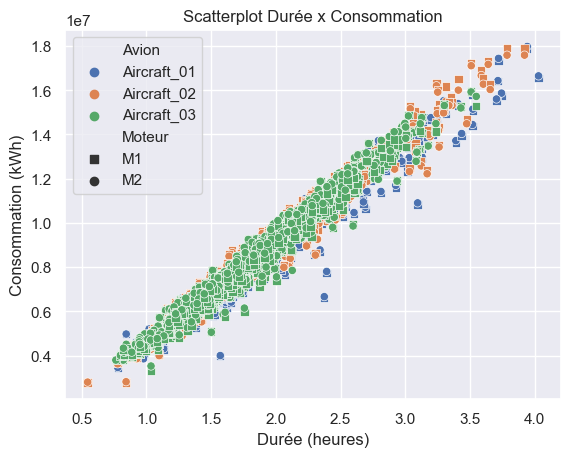

In [17]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Supposons que vous ayez des données sous forme de DataFrame (pandas)
# Vous pouvez adapter cette structure à vos données réelles
import pandas as pd

# Créer le scatterplot avec seaborn
sns.scatterplot(x='Durée_(h)', y='Consommation_(L)', 
                hue='Avion', style='Moteur', 
                markers={'M1': 's', 'M2': 'o'}, data=df)

# Ajouter des labels aux axes
plt.xlabel('Durée (heures)')
plt.ylabel('Consommation (kWh)')

# Ajouter un titre au graphique
plt.title('Scatterplot Durée x Consommation')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()


**Estimer la consommation moyenne en l/h et un intervalle de confiance.**

In [18]:
from scipy import stats

# Calculer la consommation moyenne en L/h
consommation_moyenne = df['Consommation_(L)'].mean()

# Calculer l'intervalle de confiance à 95%
conf_interval = stats.t.interval(0.95, len(df)-1, loc=consommation_moyenne, scale=stats.sem(df['Consommation_(L)']))

# Afficher les résultats
print(f"Consommation moyenne : {consommation_moyenne:.2f} L/h")
print(f"Intervalle de confiance à 95% : ({conf_interval[0]:.2f}, {conf_interval[1]:.2f}) L/h")

Consommation moyenne : 8354998.33 L/h
Intervalle de confiance à 95% : (8291388.07, 8418608.58) L/h


In [19]:
import pandas as pd

def extract_flight_data(aircraft_list):
    # Initialisation des listes pour stocker les informations extraites
    var_cruise = []
    var_montee = []
    var_descente = []

    # Boucle sur les vols
    for aircraft in aircraft_list:
        # Filtration des DataFrames vides
        if not aircraft.empty:
            # Filtration des erreurs (différence d'altitude importante)
            altitude_difference = aircraft['ALT [ft]'].max() - aircraft['ALT [ft]'].min()
            if altitude_difference > 10000:
                # Retrait des phases de taxi
                flight_data = aircraft[aircraft['PRV_1 [bool]'] == 0.0]

                # Extraction de la phase de croisière
                altitude_data = flight_data['ALT [ft]']
                cruise_indices = altitude_data[altitude_data > altitude_data.max() * 0.95].index

                # Calcul de la moyenne de l'altitude en croisière
                cruise_mean_altitude = altitude_data.loc[cruise_indices[0]:cruise_indices[-1]].mean()
                var_cruise.extend([cruise_mean_altitude] * 2)

                # Calcul de la durée de montée et de descente
                var_montee.extend([(cruise_indices[0] - altitude_data.index[0] + 1) / 3600] * 2)
                var_descente.extend([(altitude_data.index[-1] - cruise_indices[-1] + 1) / 3600] * 2)

    # Création du DataFrame final
    dataframe_final = pd.DataFrame({
        'Durée Montée (h)': var_montee,
        'Durée Descente (h)': var_descente,
        'ALT Croisière [ft]': var_cruise
    })

    return dataframe_final


In [20]:
dataframe1 = extract2(df1)

dataframe2 = extract2(df2)

dataframe3 = extract2(df3)

NameError: name 'extract2' is not defined

In [ ]:
phases = pd.concat([dataframe1, dataframe2, dataframe3], axis=0, ignore_index=True)

table_vol = pd.concat([df, phases], axis=1, ignore_index=False)

In [ ]:
table_vol

,Avion,Vol,Moteur,Durée_(h),Consommation_(L),Durée Montée (h),Durée Descente (h),ALT Croisière [ft]
0,Aircraft_01,Vol 0,M1,1.830556,8.665766e+06,0.371944,1.413056,38987.778119
1,Aircraft_01,Vol 0,M2,1.830556,8.691009e+06,0.371944,1.413056,38987.778119
2,Aircraft_01,Vol 1,M1,1.791111,8.927091e+06,0.338333,1.302778,38852.142218
3,Aircraft_01,Vol 1,M2,1.791111,8.934515e+06,0.338333,1.302778,38852.142218
4,Aircraft_01,Vol 2,M1,1.797222,8.172038e+06,0.511944,1.401944,40529.232251
...,...,...,...,...,...,...,...,...
5989,Aircraft_03,Vol 999,M2,2.143889,9.651862e+06,0.551944,1.547500,41682.419738
5990,Aircraft_03,Vol 1000,M1,1.912778,8.402275e+06,0.503889,1.298333,40257.928031
5991,Aircraft_03,Vol 1000,M2,1.912778,8.633951e+06,0.503889,1.298333,40257.928031
5992,Aircraft_03,Vol 1001,M1,1.225000,5.720750e+06,0.282778,0.839167,37062.388429


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialisation du LabelEncoder
label_encoder = LabelEncoder()

# Application du LabelEncoder aux colonnes spécifiées dans le DataFrame table_vol
table_vol['Avion'] = label_encoder.fit_transform(table_vol['Avion'])
table_vol['Vol'] = label_encoder.fit_transform(table_vol['Vol'])
table_vol['Moteur'] = label_encoder.fit_transform(table_vol['Moteur'])


Erreur absolue moyenne (MAE): 288775.8079369959
Erreur quadratique moyenne (MSE): 164670032560.5122
Racine carrée de l erreur quadratique moyenne (RMSE): 405795.5551266083
            Paramètre   Coefficient
0               Avion  7.809126e+04
1                 Vol -5.521949e+01
2              Moteur  3.657252e+03
3           Durée_(h)  4.193798e+06
4    Durée Montée (h) -8.265725e+05
5  Durée Descente (h)  4.283724e+05
6  ALT Croisière [ft]  2.055115e+01


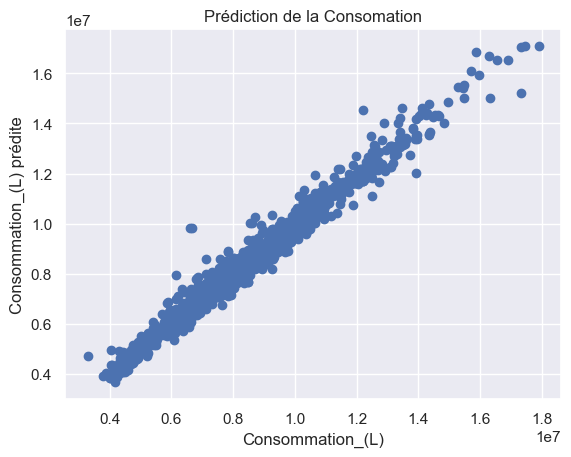

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'table_vol' est votre DataFrame

# Séparation des données en ensemble d'entraînement et ensemble de test
X = table_vol[['Avion'	,'Vol'	,'Moteur',	'Durée_(h)',
               'Durée Montée (h)',	'Durée Descente (h)',	'ALT Croisière [ft]']]
y = table_vol['Consommation_(L)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation de la performance du modèle
print('Erreur absolue moyenne (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Erreur quadratique moyenne (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Racine carrée de l erreur quadratique moyenne (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Importance des paramètres
coefficients = pd.DataFrame({'Paramètre': ['Avion'	,'Vol'	,'Moteur',	'Durée_(h)',
               'Durée Montée (h)',	'Durée Descente (h)',	'ALT Croisière [ft]'],
                             'Coefficient': model.coef_})
print(coefficients)

# Affichage du graphique de prédiction par rapport à la vérité
plt.scatter(y_test, y_pred)
plt.xlabel("Consommation_(L)")
plt.ylabel("Consommation_(L) prédite")
plt.title("Prédiction de la Consomation")
plt.show()


Afficher des boîtes à moustaches par moteur.
Afficher les courbes de consommation au cours du temps ainsi que les écarts au modèle.

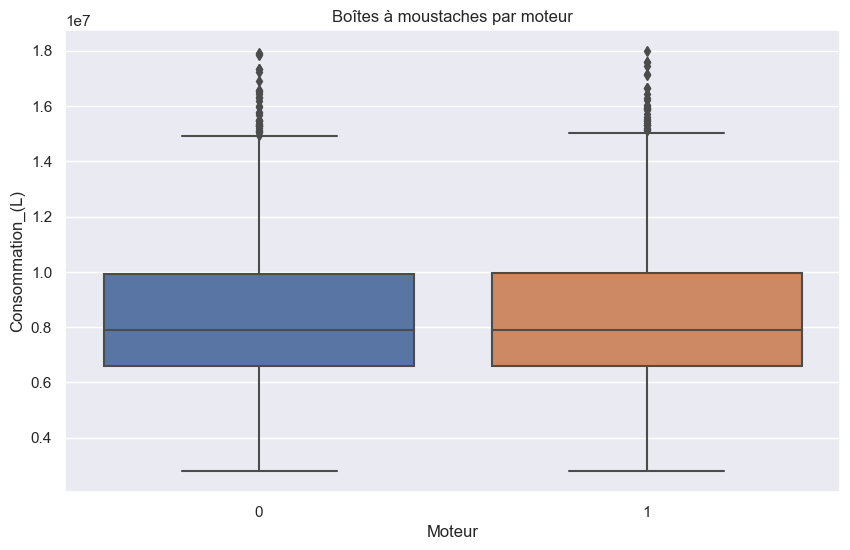

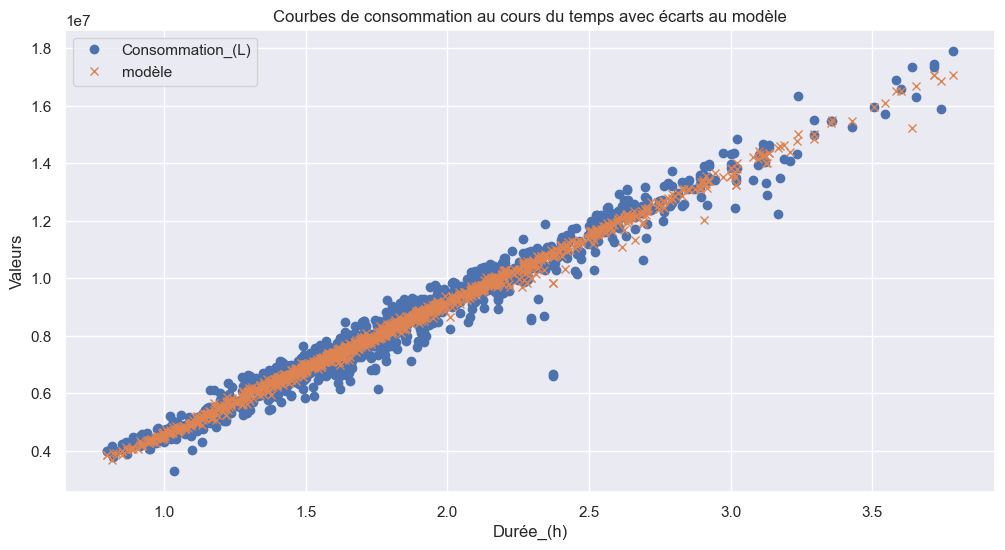

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supposons que vous ayez des données dans un DataFrame pandas
# Remplacez cela par vos propres données


df = pd.DataFrame(table_vol)

# Boîtes à moustaches par moteur
plt.figure(figsize=(10, 6))
sns.boxplot(x='Moteur', y='Consommation_(L)', data=df)
plt.title('Boîtes à moustaches par moteur')
plt.show()

# Courbes de consommation au cours du temps avec écarts au modèle
plt.figure(figsize=(12, 6))
plt.plot(X_test['Durée_(h)'], y_test, 'o', label='Consommation_(L)')
plt.plot(X_test['Durée_(h)'], y_pred, 'x', label='modèle')
plt.title('Courbes de consommation au cours du temps avec écarts au modèle')
plt.xlabel('Durée_(h)')
plt.ylabel('Valeurs')
plt.legend()
plt.show()


Erreur absolue moyenne (MAE): 158984.9719557783
Erreur quadratique moyenne (MSE): 53577355382.348274
Racine carrée de l erreur quadratique moyenne (RMSE): 231467.82796394898
            Paramètre  Coefficient
0               Avion     0.001227
1                 Vol     0.003476
2              Moteur     0.000323
3           Durée_(h)     0.975285
4    Durée Montée (h)     0.008723
5  Durée Descente (h)     0.005770
6  ALT Croisière [ft]     0.005195


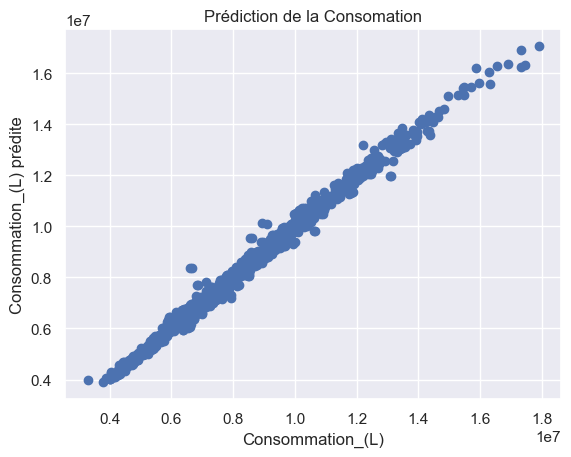

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'table_vol' est votre DataFrame

# Séparation des données en ensemble d'entraînement et ensemble de test
X = table_vol[['Avion'	,'Vol'	,'Moteur',	'Durée_(h)',
               'Durée Montée (h)',	'Durée Descente (h)',	'ALT Croisière [ft]']]
y = table_vol['Consommation_(L)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle de régression linéaire
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation de la performance du modèle
print('Erreur absolue moyenne (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Erreur quadratique moyenne (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Racine carrée de l erreur quadratique moyenne (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Importance des paramètres
coefficients = pd.DataFrame({'Paramètre': ['Avion'	,'Vol'	,'Moteur',	'Durée_(h)',
               'Durée Montée (h)',	'Durée Descente (h)',	'ALT Croisière [ft]'],
                             'Coefficient': model.feature_importances_})
print(coefficients)

# Affichage du graphique de prédiction par rapport à la vérité
plt.scatter(y_test, y_pred)
plt.xlabel("Consommation_(L)")
plt.ylabel("Consommation_(L) prédite")
plt.title("Prédiction de la Consomation")
plt.show()


In [ ]:
import pandas as pd

def extract(aircraft):
    # Initialisation des listes pour stocker les informations extraites
    var_vols = []
    var_duree = []
    var_conso = []
    
    # Boucle sur les vols
    for j in range(len(aircraft)):
        # Filtration des dataframes vides
        if len(aircraft[j].columns) > 0:
            # Filtration des erreurs d'altitude
            if abs(aircraft[j]['ALT [ft]'].max() - aircraft[j]['ALT [ft]'].min()) > 10000:
                # Retrait des phases taxis
                dataframe_vol = aircraft[j][aircraft[j]['PRV_1 [bool]'] == 0.0]
                
                # Identification de la phase de croisiere
                alt_vol = dataframe_vol['ALT [ft]']
                cruise_idx = alt_vol[(alt_vol > max(alt_vol) * 0.95)].index
                
                # Phase de montee
                dataframe_vol = dataframe_vol.loc[alt_vol.index[0]:cruise_idx[0], :]
                
                # Création des étiquettes pour le vol
                var_vols += [f'Vol {j}'] * 2   # Vol           
                
                # Calcul de la durée en heures
                var_duree += [(dataframe_vol.index[-1] - dataframe_vol.index[0] + 1) / 3600] * 2
                
                # Calcul de la consommation en litres
                var_conso1 = dataframe_vol['Q_1 [lb/h]'].sum() / 2.2046 * 1.25
                var_conso2 = dataframe_vol['Q_2 [lb/h]'].sum() / 2.2046 * 1.25
                var_conso += [var_conso1, var_conso2]

    # Nom de l'avion
    nom_avion = aircraft.storename[5:]
    
    # Création du DataFrame final
    dataframe_final = pd.DataFrame()
    dataframe_final['Avion'] = [nom_avion] * len(var_vols)
    dataframe_final["Vol"] =  var_vols
    dataframe_final['Moteur'] = ["M1", "M2"] * (len(var_vols) // 2)
    dataframe_final["Durée_(h)"] = var_duree
    dataframe_final["Consommation_(L)"] = var_conso
    
    return dataframe_final


In [ ]:
dataframe1 = extract(df1)
dataframe2 = extract(df2)
dataframe3 = extract(df3)

In [ ]:
df = pd.concat([dataframe1, dataframe2, dataframe3], axis=0, ignore_index=True)
df

,Avion,Vol,Moteur,Durée_(h),Consommation_(L)
0,aft_01.h5,Vol 0,M1,0.371944,2.815882e+06
1,aft_01.h5,Vol 0,M2,0.371944,2.815749e+06
2,aft_01.h5,Vol 1,M1,0.338333,2.970711e+06
3,aft_01.h5,Vol 1,M2,0.338333,2.958281e+06
4,aft_01.h5,Vol 2,M1,0.511944,3.343862e+06
...,...,...,...,...,...
5989,aft_03.h5,Vol 999,M2,0.551944,3.382168e+06
5990,aft_03.h5,Vol 1000,M1,0.503889,3.150757e+06
5991,aft_03.h5,Vol 1000,M2,0.503889,3.221999e+06
5992,aft_03.h5,Vol 1001,M1,0.282778,2.385333e+06


Erreur absolue moyenne (MAE): 198069.2668791385
Erreur quadratique moyenne (MSE): 104305487192.42076
Racine carrée de l erreur quadratique moyenne (RMSE): 322963.6004140726
   Paramètre  Coefficient
0      Avion     0.002852
1        Vol     0.012326
2     Moteur     0.000621
3  Durée_(h)     0.984201


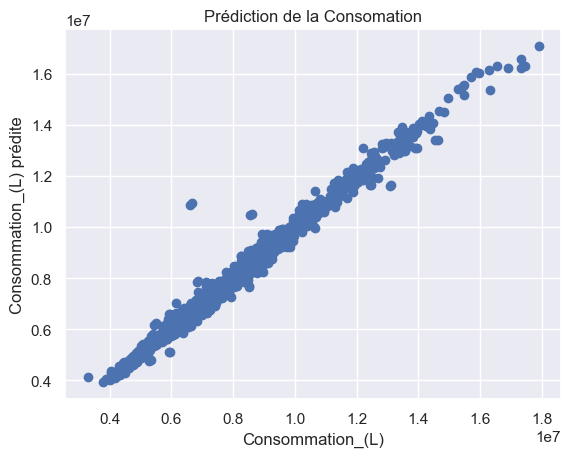

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'table_vol' est votre DataFrame

# Séparation des données en ensemble d'entraînement et ensemble de test
X = table_vol[['Avion'	,'Vol'	,'Moteur',	'Durée_(h)']]
y = table_vol['Consommation_(L)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle de régression linéaire
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation de la performance du modèle
print('Erreur absolue moyenne (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Erreur quadratique moyenne (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Racine carrée de l erreur quadratique moyenne (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Importance des paramètres
coefficients = pd.DataFrame({'Paramètre': ['Avion'	,'Vol'	,'Moteur',	'Durée_(h)'],
                             'Coefficient': model.feature_importances_})
print(coefficients)

# Affichage du graphique de prédiction par rapport à la vérité
plt.scatter(y_test, y_pred)
plt.xlabel("Consommation_(L)")
plt.ylabel("Consommation_(L) prédite")
plt.title("Prédiction de la Consomation")
plt.show()


In [5]:
from utils import get_consumption, detect_phase

In [6]:
df1[0]['TAT [deg C]'].values[0]

28.92124445475

In [36]:
'''
# Climb phase dataframe 
dfc1 = get_consumption(df1,'climb')
dfc2 = get_consumption(df2,'climb')
dfc3 = get_consumption(df3,'climb')
df_climb = pd.concat([dfc1, dfc2, dfc3], axis=0, ignore_index=True)

'''
# Cruise phase dataframe 
dfc1 = get_consumption(df1,'cruise')
dfc2 = get_consumption(df2,'cruise')
dfc3 = get_consumption(df3,'cruise')
df_cruise = pd.concat([dfc1, dfc2, dfc3], axis=0, ignore_index=True)

# Descend phase dataframe 
dfc1 = get_consumption(df1,'descend')
dfc2 = get_consumption(df2,'descend')
dfc3 = get_consumption(df3,'descend')
df_descend = pd.concat([dfc1, dfc2, dfc3], axis=0, ignore_index=True)

'''
# Taxi phase dataframe 
dfc1 = get_consumption(df1,'taxi')
dfc2 = get_consumption(df2,'taxi')
dfc3 = get_consumption(df3,'taxi')
df_taxi = pd.concat([dfc1, dfc2, dfc3], axis=0, ignore_index=True)
'''

Record is incomplete
384
Record is incomplete
519
Record is incomplete
895
Record is incomplete
519
Record is incomplete
384
Record is incomplete
519
Record is incomplete
895
Record is incomplete
519


"\n# Taxi phase dataframe \ndfc1 = get_consumption(df1,'taxi')\ndfc2 = get_consumption(df2,'taxi')\ndfc3 = get_consumption(df3,'taxi')\ndf_taxi = pd.concat([dfc1, dfc2, dfc3], axis=0, ignore_index=True)\n"

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialisation du LabelEncoder
label_encoder = LabelEncoder()

for df in [df_climb , df_cruise , df_descend]: # , df_taxi]:
    # Application du LabelEncoder aux colonnes spécifiées dans le DataFrame table_vol
    df['Aircraft'] = label_encoder.fit_transform(df['Aircraft'])
    df['Flight'] = label_encoder.fit_transform(df['Flight'])
    df['Engine'] = label_encoder.fit_transform(df['Engine'])

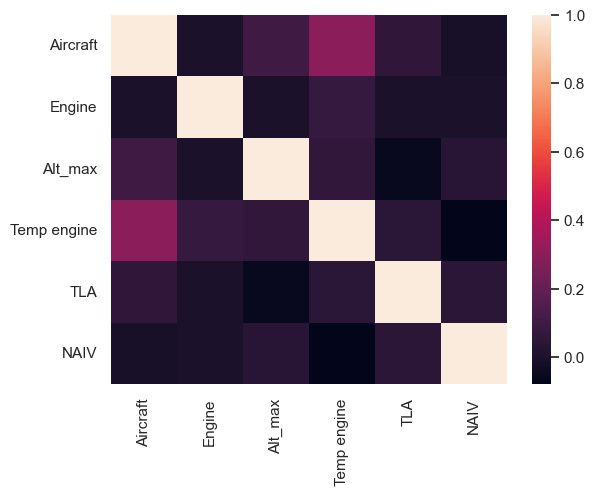

In [56]:
# Correlations variables 

indicateurs = [ 'Aircraft', 'Engine', #  'Flight', # 'Phase duration',
               'Alt_max',
               # 'Mach_max',
               'Temp engine',
               'TLA',
               'NAIV']

sns.heatmap(df_climb[indicateurs].corr())
plt.show()

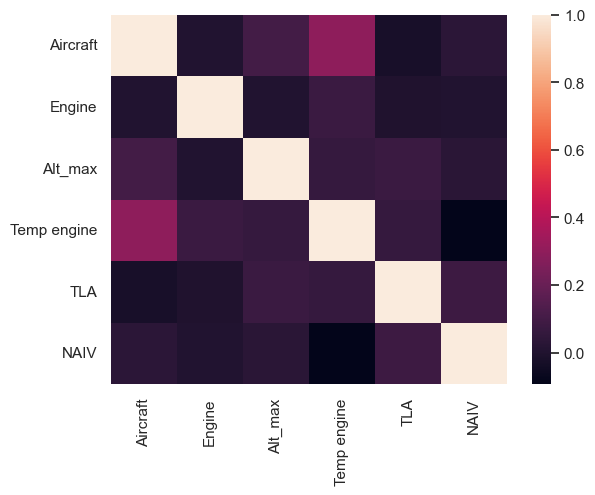

In [57]:
sns.heatmap(df_descend[indicateurs].corr())
plt.show()

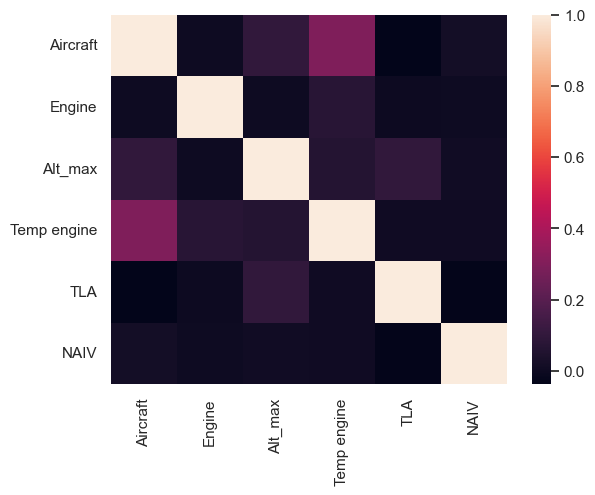

In [58]:
sns.heatmap(df_cruise[indicateurs].corr())
plt.show()

sns.heatmap(df_taxi[indicateurs].corr())
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



def rf_prediction(df):

    # Données de régression linéaire avec une seule variable importante
    X_linear = df['Phase duration'].values.reshape(-1, 1)
    y = df['Total consumption']

    # Ajustement de la régression linéaire
    regression = LinearRegression()
    regression.fit(X_linear, y)

    # Calcul des résidus
    residus = y - regression.predict(X_linear)

    # Données supplémentaires pour le random forest
    X_random_forest = df[indicateurs]

    # Division des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_random_forest, residus, test_size=0.2, random_state=42)

    # Construction du modèle de random forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    predictions = model.predict(X_test)


    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Évaluation de la performance du modèle
    print('Erreur absolue moyenne (MAE):', metrics.mean_absolute_error(y_test, y_pred))
    print('Erreur quadratique moyenne (MSE):', metrics.mean_squared_error(y_test, y_pred))
    print('Racine carrée de l erreur quadratique moyenne (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    # Importance des paramètres
    coefficients = pd.DataFrame({'Paramètre': indicateurs ,
                                 'Coefficient': model.feature_importances_})
    print(coefficients)

    # Affichage du graphique de prédiction par rapport à la vérité
    plt.scatter(y_test  , y_pred)
    plt.xlabel("Consommation_(L)")
    plt.ylabel("Consommation_(L) prédite")
    plt.title("Prédiction de la Consomation")
    plt.show()
    
    return model , coefficients

Erreur absolue moyenne (MAE): 28.88906282851852
Erreur quadratique moyenne (MSE): 1561.0182688774178
Racine carrée de l erreur quadratique moyenne (RMSE): 39.509723725652876
     Paramètre  Coefficient
0     Aircraft     0.044198
1       Engine     0.014157
2      Alt_max     0.297294
3  Temp engine     0.170553
4          TLA     0.371821
5         NAIV     0.101976


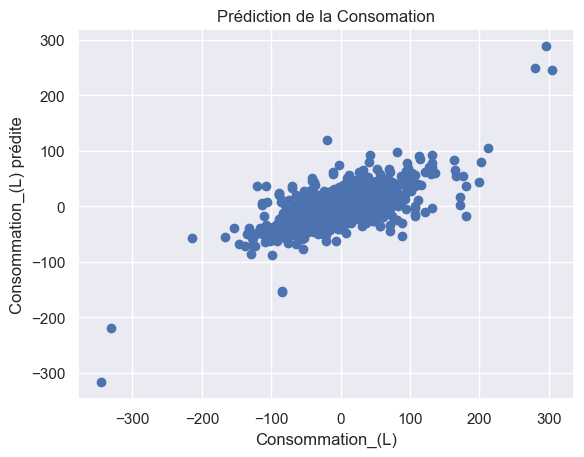

In [84]:
model_descend , coeff_descend = rf_prediction(df_descend)

Erreur absolue moyenne (MAE): 25.677673889875773
Erreur quadratique moyenne (MSE): 1326.494112125676
Racine carrée de l erreur quadratique moyenne (RMSE): 36.42106687242531
     Paramètre  Coefficient
0     Aircraft     0.033647
1       Engine     0.008582
2      Alt_max     0.393520
3  Temp engine     0.166170
4          TLA     0.360036
5         NAIV     0.038045


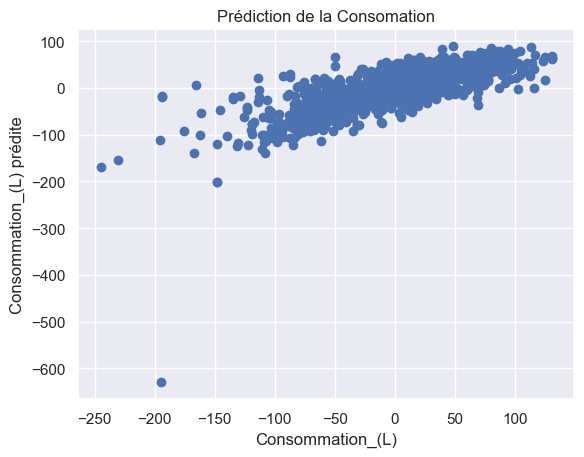

In [85]:
model_climb , coeff_climb = rf_prediction(df_climb)

Erreur absolue moyenne (MAE): 53.24109281959023
Erreur quadratique moyenne (MSE): 6035.457470163256
Racine carrée de l erreur quadratique moyenne (RMSE): 77.6882067637248
     Paramètre  Coefficient
0     Aircraft     0.062388
1       Engine     0.020158
2      Alt_max     0.358290
3  Temp engine     0.236923
4          TLA     0.317813
5         NAIV     0.004429


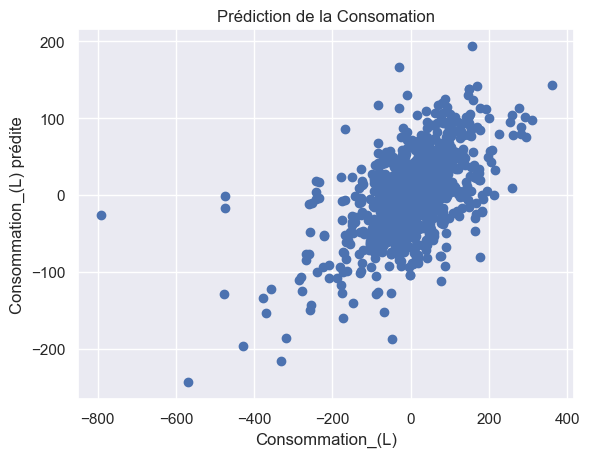

In [86]:
model_cruise , coeff_cruise = rf_prediction(df_cruise)

In [64]:
# model_taxi , coeff_taxi = rf_prediction(df_taxi)

In [65]:
def plot_feature_imporatances(model , coeff):
    # Get feature importances
    feature_importances = model.feature_importances_
    # Get the names of features
    feature_names = coeff['Paramètre']  # Replace with your actual feature names
    # Sort feature importances in descending order
    indices = np.argsort(coeff['Coefficient'])[::-1]
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[indices])
    plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=45)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Random Forest Feature Importance')
    plt.show()

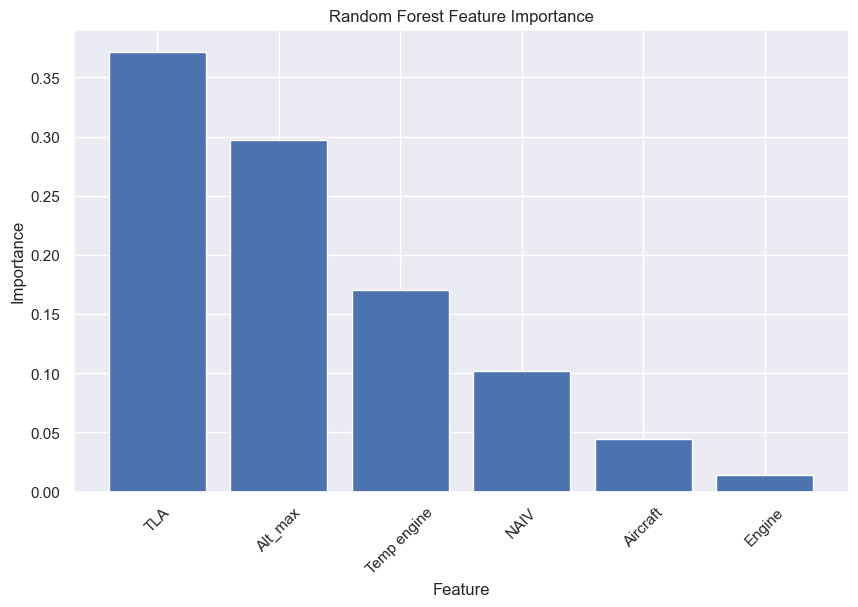

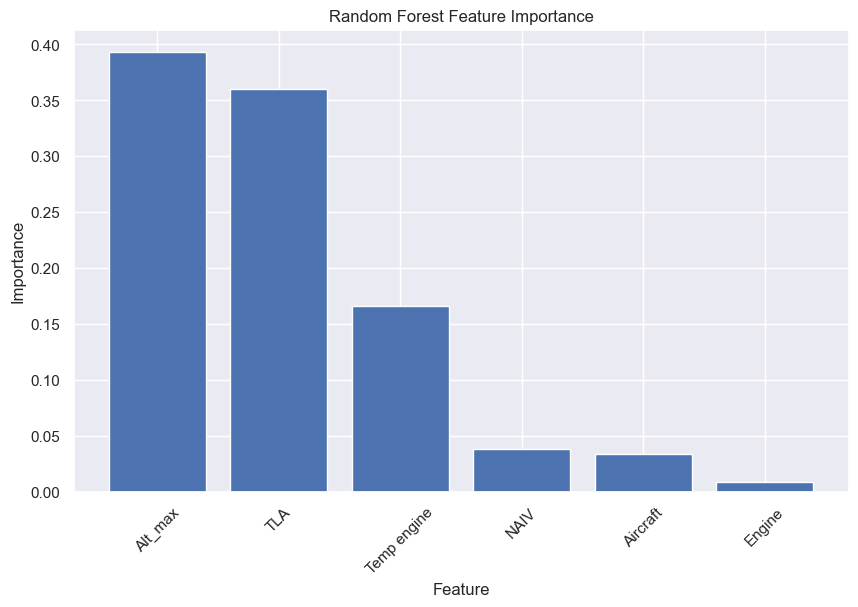

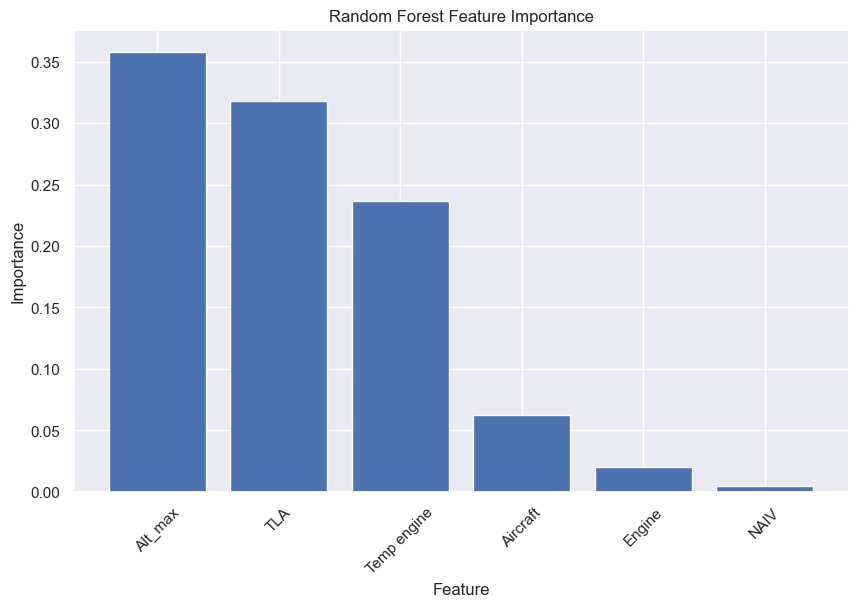

In [66]:
plot_feature_imporatances(model_descend , coeff_descend)
plot_feature_imporatances(model_climb , coeff_climb)
plot_feature_imporatances(model_cruise , coeff_cruise)
# plot_feature_imporatances(model_taxi , coeff_taxi)